# Normalized topological indices discriminate between architectures of branched macromolecules

## Tree generation

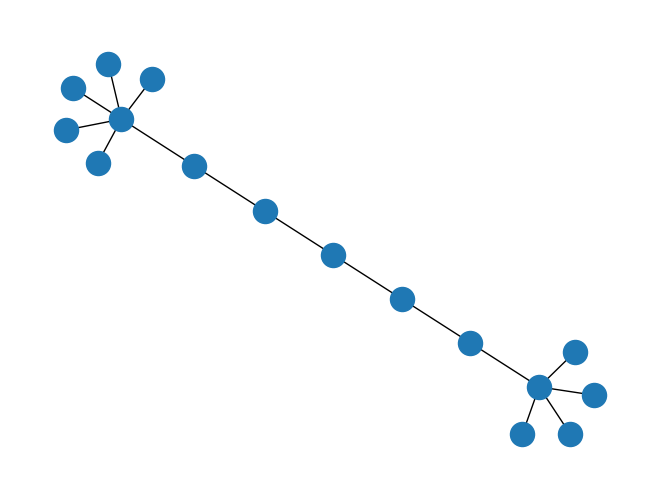

In [1]:
from topological_indices import tree_generation, plotting

# Generate 10 random trees with N = 15 edges
Ts = tree_generation.random_trees(15, number_of_trees=10)

# Generate 10 random Barabási-Albert trees with N = 15 edges
Ts = tree_generation.random_BA_trees(15, number_of_trees=10)

# Generate all non-isomorphic trees with N = 15 edges
Ts = tree_generation.all_trees(15)

# Generate special trees
T = tree_generation.linear_tree(15)
T = tree_generation.star_tree(15)
T = tree_generation.dumbbell_tree(15, 4)

# Generate all n-cyclic graphs (nauty traces required)
# Gs = tree_generation.all_ncyclic_graphs(8, 2)

# Plot a tree
plotting.plot_tree(T)

In [2]:
# Check properties of tree
tree_generation.is_chemical(T), tree_generation.is_caterpillar(T), tree_generation.is_lobster(T)

(False, True, True)

## Topological indices

In [3]:
from topological_indices import topological_indices

T = tree_generation.dumbbell_tree(15, 4)

# Calculate all topological indices
TIs = topological_indices.calculate_TIs(T)

TIs

{'N': 15,
 'MLD': 8,
 'ALD': 4.166666666666667,
 'NA': 30,
 'λ2': 0.052875513694222824,
 'λN': 7.0355339781098785,
 'M1': 90,
 'M2': 88,
 'W': 500.0,
 'P': 13,
 'ABC': 12.384704096995334,
 'R': 6.434998734930798,
 'SC': 6.254333390504088,
 'H1': 1.0416666666666747,
 'H2': 12.485416666666971,
 'J': 3.9038806097351237,
 'EE': 38.526051740008654,
 'B': 93}

In [4]:
# Calculate topological indices and perform simple normalization ...
TIs_simple = topological_indices.calculate_TIs(T, normalization='simple')

# ... or normalize precomputed topological indices.
# TIs_simple = topological_indices.normalize_topological_indices(TIs, 'simple')

TIs_simple

{"MLD'": 0.5384615384615384,
 "ALD'": 0.3956043956043956,
 "NA'": 0.17582417582417584,
 "λ2'": 0.015023415950429699,
 "λN'": 0.2553458848457017,
 "M1'": 0.17582417582417584,
 "M2'": 0.1893491124260355,
 "W'": 0.3956043956043956,
 "P'": -0.0,
 "ABC'": 0.45771051507543076,
 "R'": 0.3660308243576821,
 "SC'": 0.35863624728989424,
 "H1'": 0.39560439560438204,
 "H2'": 0.5000893635688893,
 "J'": 0.1351336544891221,
 "EE'": 0.13037838525249917,
 "B'": 0.3160621761658031}

In [5]:
# Calculate topological indices and perform cdf normalization ...
TIs_cdf = topological_indices.calculate_TIs(T, normalization='cdf')

# ... or normalize precomputed topological indices.
# TIs_cdf = topological_indices.normalize_topological_indices(TIs, 'cdf')

TIs_cdf

{'ABC*': 0.9721088610969462,
 'H2*': 0.053212625186175755,
 'W*': 0.1370419201943633,
 'R*': 0.9479883670788042}

## Phase space

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate 500 random trees with N = 30 edges
N = 30
Ts = tree_generation.random_trees(N, number_of_trees=500)

# Calculate topological indices and perform both normalizations
TIs = [topological_indices.calculate_TIs(T, ['H2', 'ABC', 'W', 'R']) for T in Ts]
TIs_simple = [topological_indices.normalize_TIs(_TIs, 'simple', N) for _TIs in TIs]
TIs_cdf = [topological_indices.normalize_TIs(_TIs, 'cdf', N) for _TIs in TIs]

df = pd.concat([
    pd.DataFrame.from_dict(TIs),
    pd.DataFrame.from_dict(TIs_simple),
    pd.DataFrame.from_dict(TIs_cdf),
], axis=1)

df

,H2,ABC,W,R,H2',ABC',W',R',H2*,ABC*,W*,R*
0,35.104475,22.248597,2838.0,14.231835,0.797518,0.125009,0.522660,0.118988,0.164140,0.308065,0.151330,0.218365
1,29.490219,22.087929,2692.0,14.304019,0.830353,0.105611,0.558621,0.111723,0.272119,0.202000,0.272918,0.166899
2,34.891537,22.232994,2774.0,14.149154,0.798763,0.123125,0.538424,0.127308,0.167352,0.297103,0.198680,0.283399
3,21.588207,22.680867,2426.0,13.730619,0.876568,0.177199,0.624138,0.169427,0.529557,0.617800,0.593213,0.628177
4,16.789941,22.054780,2390.0,14.278241,0.904631,0.101608,0.633005,0.114318,0.739032,0.182451,0.639333,0.184608
...,...,...,...,...,...,...,...,...,...,...,...,...
495,18.507111,21.994117,2532.0,14.382906,0.894588,0.094284,0.598030,0.103785,0.662584,0.149230,0.456397,0.118028
496,16.641415,21.621795,2448.0,14.593024,0.905499,0.049332,0.618719,0.082640,0.745559,0.025396,0.564694,0.032375
497,13.666459,23.003567,2210.0,13.495785,0.922898,0.216161,0.677340,0.193059,0.866360,0.795377,0.839349,0.776169
498,37.228616,23.433187,2780.0,13.293143,0.785094,0.268031,0.536946,0.213452,0.135219,0.926525,0.193847,0.864837


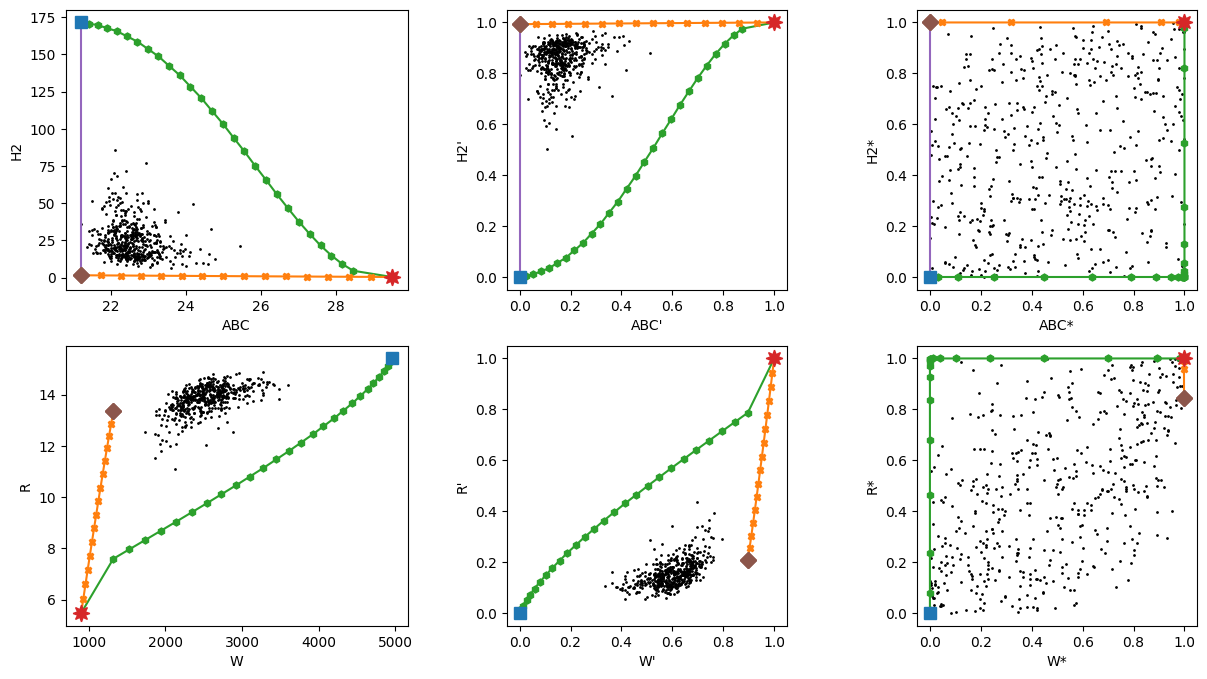

In [7]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))

df.plot.scatter('ABC', 'H2', ax=axes[0,0], s=1, c='k')
df.plot.scatter("ABC'", "H2'", ax=axes[0,1], s=1, c='k')
df.plot.scatter('ABC*', 'H2*', ax=axes[0,2], s=1, c='k')

df.plot.scatter('W', 'R', ax=axes[1,0], s=1, c='k')
df.plot.scatter("W'", "R'", ax=axes[1,1], s=1, c='k')
df.plot.scatter('W*', 'R*', ax=axes[1,2], s=1, c='k')

# Draw phase space boundaries
plotting.plot_phase_space_boundary(N, ['ABC', 'H2'], ax=axes[0,0])
plotting.plot_phase_space_boundary(N, ['ABC', 'H2'], normalization='simple', ax=axes[0,1])
plotting.plot_phase_space_boundary(N, ['ABC', 'H2'], normalization='cdf', ax=axes[0,2])

plotting.plot_phase_space_boundary(N, ['W', 'R'], ax=axes[1,0])
plotting.plot_phase_space_boundary(N, ['W', 'R'], normalization='simple', ax=axes[1,1])
plotting.plot_phase_space_boundary(N, ['W', 'R'], normalization='cdf', ax=axes[1,2])

## RNA

In [8]:
from topological_indices.rna import rna_structure, rna_tree
from topological_indices import utilities

# Sequence ID
# GB_AJ223598   BVQ virus
# GB_KF031038   BlShV virus
# RAND_2600     Random sequence with 2600 nt
seqid = 'GB_KF031038'

# Import sequence and generate secondary structures ...
# seq = utilities.get_RNA_sequence(seqid)
# dbs = rna_structure.generate_structures(seq, number_of_structures=500)
# utilities.save_RNA_structures(seqid, dbs)

# ... or load precomputed structures
dbs = utilities.get_RNA_structures(seqid)

# Take first stucture
db = dbs[0]

# Convert secondary structure to tree with simple mapping
T = rna_tree.dotbracket_to_tree(db)

# Convert tree to RAG mapping
T_RAG = rna_tree.RAGify_tree(T) 

# Calculate topological indices
topological_indices.calculate_TIs(T_RAG, normalization='cdf')

{'ABC*': 0.33034613225645926,
 'H2*': 0.9945462419190798,
 'W*': 0.9997136173024828,
 'R*': 0.8895397813711983}

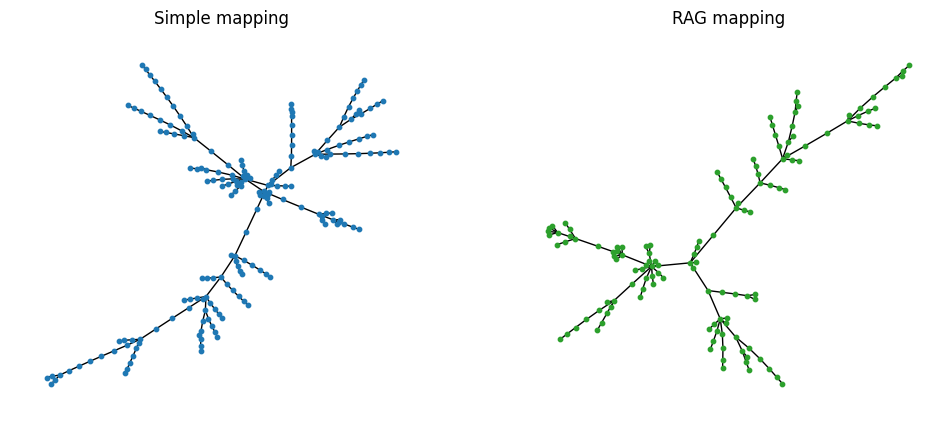

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
plotting.plot_tree(T, iterations=1500, node_size=10, ax=axes[0])
plotting.plot_tree(T_RAG, iterations=1500, node_size=10, node_color='tab:green', ax=axes[1])

axes[0].set_title('Simple mapping')
axes[1].set_title('RAG mapping');

## Coarse-graining

In [10]:
from topological_indices import laplacian_coarse_graining, modularity_coarse_graining

# Generate a random tree with N = 100 edges
T = tree_generation.random_tree(100, seed=123)

# Perform modularity-based coarse graining (MM) to target_N = 25 edges
T_MM = modularity_coarse_graining.coarse_grain(T, target_N=25)

# Perform Laplacian renormalization group coarse graining (LRG) to target_N = 25 edges
T_LRG = laplacian_coarse_graining.coarse_grain(T, target_N=25)

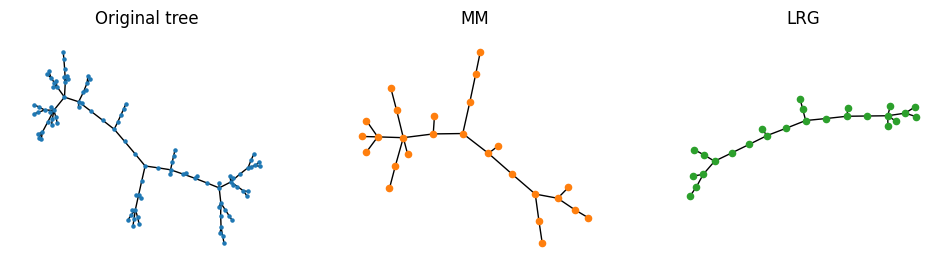

In [11]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))
plotting.plot_tree(T, node_size=5, ax=axes[0])
plotting.plot_tree(T_MM, node_size=20, node_color='tab:orange', ax=axes[1])
plotting.plot_tree(T_LRG, node_size=20, node_color='tab:green', ax=axes[2])

axes[0].set_title('Original tree')
axes[1].set_title('MM');
axes[2].set_title('LRG');

## Normalization preparation procedure

The following steps can be executed to recalculate the normalization procedure:

1. Calculate topological indices for linear and star trees

````
python scripts/analyze_linear_star_trees.py
````

2. Generate random trees

````
python scripts/generate_random_trees.py
````

3. Calculate topological indices for random trees

````
python scripts/analyze_random_trees.py
````

4. Fit analytical distributions to random trees

````
python scripts/fit_distributions_for_random_trees.py
````

5. Fit scalings to extracted parameters

````
python scripts/fit_scalings.py
````